# 3 Layer neural network using JAX

# LInear Equation

Epoch 0, loss 17.02520751953125


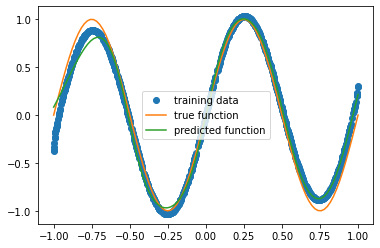

In [11]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

# Define the non-linear equation to be solved
def f(x):
    return jnp.sin(2 * jnp.pi * x)

# Define the neural network
def init_network_params(layer_sizes, rng_key=random.PRNGKey(0)):
    """Randomly initialize the weights and biases of the neural network"""
    params = []
    for n_in, n_out in zip(layer_sizes[:-1], layer_sizes[1:]):
        rng_key, subkey = random.split(rng_key)
        weight_matrix = random.normal(subkey, (n_in, n_out))
        rng_key, subkey = random.split(rng_key)
        bias_vector = random.normal(subkey, (n_out,))
        params.append((weight_matrix, bias_vector))
    return params

def neural_network(params, x):
    """Feed-forward computation of the neural network"""
    for w, b in params[:-1]:
        x = jnp.tanh(jnp.dot(x, w) + b)
    final_w, final_b = params[-1]
    return jnp.dot(x, final_w) + final_b

# Define the loss function
def mse_loss(params, inputs, targets):
    """Mean squared error loss"""
    preds = neural_network(params, inputs)
    return jnp.mean((preds - targets)**2)

# Define the update function
def update(params, inputs, targets, learning_rate):
    """Update function for gradient descent"""
    grads = grad(mse_loss)(params, inputs, targets)
    return [(w - learning_rate * dw, b - learning_rate * db) 
            for (w, b), (dw, db) in zip(params, grads)]

# Define the training loop
def train(layer_sizes, x, y, learning_rate, num_epochs):
    """Train the neural network"""
    params = init_network_params(layer_sizes)
    for epoch in range(num_epochs):
        params = update(params, x, y, learning_rate)
        if epoch % 1000 == 0:
            loss = mse_loss(params, x, y)
            print(f"Epoch {epoch}, loss {loss}")
    return params

# Generate some synthetic data
rng_key = random.PRNGKey(0)
x = random.uniform(rng_key, (1000, 1), minval=-1., maxval=1.)
y = f(x) + 0.1 * random.normal(rng_key, (1000,1))

# Train the neural network
layer_sizes = [1, 10, 10, 1]
learning_rate = 0.1
num_epochs = 1000
params = train(layer_sizes, x, y, learning_rate, num_epochs)

# Make predictions with the trained neural network
x_test = jnp.linspace(-1, 1, num=100)
x_test = x_test.reshape((100, 1))
y_pred = neural_network(params, x_test)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='training data')
plt.plot(x_test, f(x_test), label='true function')
plt.plot(x_test, y_pred, label='predicted function')
plt.legend()
plt.show()


# Non Linear Equation

In [19]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

# Define the neural network
def nn(params, x):
    w1, b1, w2, b2, w3, b3 = params
    
    hidden1 = jnp.tanh(jnp.dot(x, w1) + b1)
    hidden2 = jnp.tanh(jnp.dot(hidden1, w2) + b2)
    output = jnp.dot(hidden2**3, w3) + jnp.dot(hidden2**2, w3) + jnp.dot(hidden2, w3) + b3
    
    return output

# Define the loss function
def loss(params, x, y):
    y_pred = nn(params, x)
    return jnp.mean((y - y_pred)**2)

# Define the update function for the optimizer
def update(params, x, y, lr):
    grads = grad(loss)(params, x, y)
    return [(param - lr * grad) for param, grad in zip(params, grads)]

# Initialize the network's parameters
key = random.PRNGKey(0)
input_size = 1
hidden_size = 10
output_size = 1
w1 = random.normal(key, (input_size, hidden_size))
b1 = random.normal(key, (hidden_size,))
w2 = random.normal(key, (hidden_size, hidden_size))
b2 = random.normal(key, (hidden_size,))
w3 = random.normal(key, (hidden_size, output_size))
b3 = random.normal(key, (output_size,))
params = (w1, b1, w2, b2, w3, b3)

training_losses = []

# Generate some training data
x_train = jnp.linspace(-1, 1, 100)[:, jnp.newaxis]
y_train = jnp.sin(3*jnp.pi*x_train)

# Train the network
lr = 0.01
num_epochs = 1000
for epoch in range(num_epochs):
    params = update(params, x_train, y_train, lr)
    training_loss = loss(params, x_train, y_train)
    training_losses.append(training_loss)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss {loss(params, x_train, y_train)}")


Epoch 0, loss 1.1673932075500488
Epoch 100, loss 0.4558761417865753
Epoch 200, loss 0.44964325428009033
Epoch 300, loss 0.4456503987312317
Epoch 400, loss 0.44234222173690796
Epoch 500, loss 0.43922004103660583
Epoch 600, loss 0.43599748611450195
Epoch 700, loss 0.4323882460594177
Epoch 800, loss 0.4280592203140259
Epoch 900, loss 0.4228656589984894


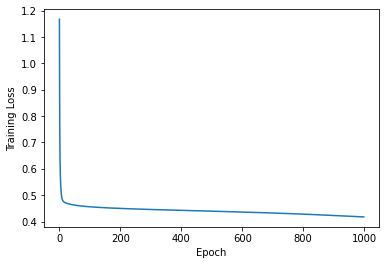

In [20]:
plt.plot(training_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.show()